<a href="https://colab.research.google.com/github/serzhoon/NoSQL_NCFU/blob/main/lab05_NoSQL_Neo4J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Отчёт по лабораторной работе на тему: Neo4j

### Выполнил студент группы ПИН-Б-З-22-1

### Гадиян Сергей Гариевич

###Задачи

 Создайте простой граф, описывающий некоторых ваших близких друзей, ваши отношения с ними,
а также некоторые отношения между друзьями. Начните с трёх узлов, включая себя, и создайте
пять отношений.

In [ ]:
CREATE (:Person {name: "Сергей Гадиян", age: 25, city: "Ставрополь"}); # узел с моим именем
CREATE (:Person {name: "Алексей Ковалев", age: 26, city: "Ставрополь"}); # узел друга
CREATE (:Person {name: "Мария Семенова", age: 24, city: "Ставрополь"}); # узел подруги
CREATE (:Person {name: "Николай Белов", age: 27, city: "Ставрополь"}); # узел еще одного друга
CREATE (:Person {name: "Анна Козлова", age: 23, city: "Ставрополь"}); # узел еще одной подруги
MATCH (s:Person {name: "Сергей Гадиян"}), (a:Person {name: "Алексей Ковалев"}) CREATE (s)-[:ДРУГ]->(a); # Сергей дружит с Алексеем
MATCH (s:Person {name: "Сергей Гадиян"}), (m:Person {name: "Мария Семенова"}) CREATE (s)-[:ДРУГ]->(m); # Сергей дружит с Марией
MATCH (a:Person {name: "Алексей Ковалев"}), (m:Person {name: "Мария Семенова"}) CREATE (a)-[:КОЛЛЕГА]->(m); # Алексей работает с Марией
MATCH (s:Person {name: "Сергей Гадиян"}), (n:Person {name: "Николай Белов"}) CREATE (s)-[:СОСЕД]->(n); # Сергей сосед Николая
MATCH (m:Person {name: "Мария Семенова"}), (anna:Person {name: "Анна Козлова"}) CREATE (m)-[:ПОДРУГА]->(anna); # Мария подруга Анны
MATCH (n:Person {name: "Николай Белов"}), (anna:Person {name: "Анна Козлова"}) CREATE (n)-[:РАБОТАЕТ_С]->(anna); # Николай работает с Анной
MATCH (s:Person {name: "Сергей Гадиян"}), (anna:Person {name: "Анна Козлова"}) CREATE (s)-[:ЗНАКОМЫЙ]->(anna); # Сергей знаком с Анной

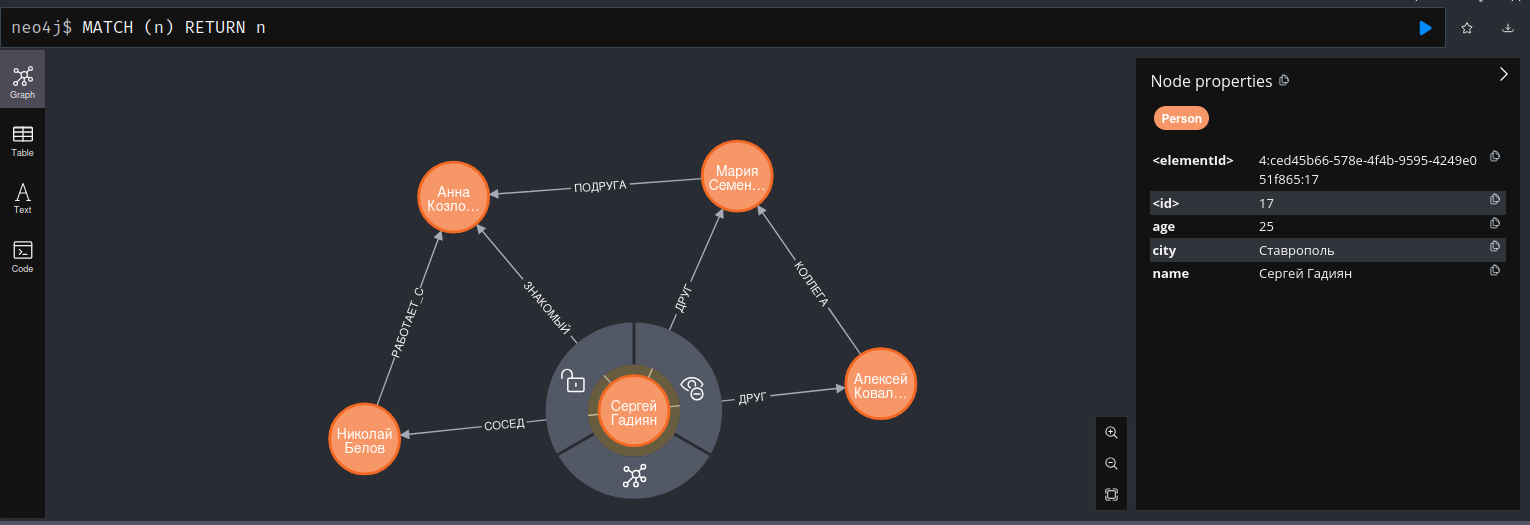

Преобразуйте часть поиска пути в алгоритме Кевина Бэкона в отдельный шаг. Затем реализуйте универсальную функцию на Groovy (например, def actor_path(g, name1, name2) {...}), которая принимает граф и два имени и сравнивает расстояния

In [ ]:
:play movie-graph # создание базы данных фильмов, она встроена в neo4j

In [ ]:
# сначала задаем первый параметр
:param name1 => "Kevin Bacon"
# затем второй параметр
:param name2 => "Tom Hanks"
# выполняем запрос
MATCH p = shortestPath(
  (a1:Person {name: $name1}) # найти первого актера из параметра
  -[:ACTED_IN*]-
   (a2:Person {name: $name2}) # найти второго актера
)
RETURN "actor_path('" + $name1 + "', '" + $name2 + "')" AS функция,
       length(p)/2 AS результат;

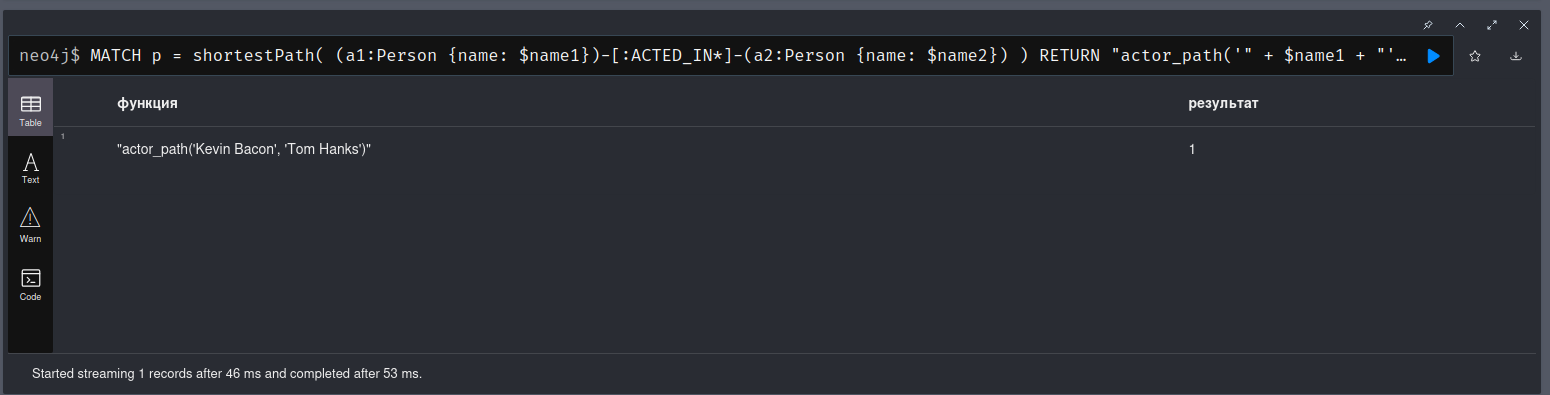